<a href="https://colab.research.google.com/github/jeffreytjs/Dengue_Forecasting_In_Singapore/blob/master/4_Datathon_3_0_Dengue_Outbreak_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Datathon 3.0 Dengue Outbreak Forecasting

In [0]:
#Hypothesis
'''
Because dengue fever is a tropical disease, we would expect it to be more popular in place with high temperature, 
high precipitation and thus high humidity.
The disease is transmitted by mosquitoes, whose peak season is summer, so we will expect summer to have more dengue 
cases than the rest of the year.
'''

'\nBecause dengue fever is a tropical disease, we would expect it to be more popular in place with high temperature, \nhigh precipitation and thus high humidity.\nThe disease is transmitted by mosquitoes, whose peak season is summer, so we will expect summer to have more dengue \ncases than the rest of the year.\n'

In [0]:
#Importing packages
import re
import time
import datetime 
import operator
import numpy as np
import pandas as pd 
import collections
import unicodedata
import collections
import seaborn as sns
import collections
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from datetime import datetime, date, timedelta
from IPython.display import Image
%matplotlib inline
#If the IPython notebook is used the inline backend can be invoked to remove the necessity of calling show after each plot.

In [0]:
# connecting to google drive
from google.colab import drive 
drive.mount('/mntDrive') 

Drive already mounted at /mntDrive; to attempt to forcibly remount, call drive.mount("/mntDrive", force_remount=True).


In [0]:
#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv('/mntDrive/My Drive/Datathon Dengue/data/dengue_features_train.csv')
dengue_features_test = pd.read_csv('/mntDrive/My Drive/Datathon Dengue/data/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('/mntDrive/My Drive/Datathon Dengue/data/dengue_labels_train.csv')


In [0]:
#Display the train data
dengue_features_train.head()

,city,year,weekofyear,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_+1,temp_range
0,sg,2014,3,0.000000,27.075000,30.350000,24.925000,71,65,10,43,57,95,54,336,5.425000
1,sg,2014,4,8.171429,26.171429,29.614286,24.057143,73,52,10,49,49,56,63,234,5.557143
2,sg,2014,5,2.600000,26.271429,29.100000,24.357143,61,79,11,55,31,48,18,273,4.742857
3,sg,2014,6,0.000000,25.757143,29.014286,23.642857,73,62,5,62,45,51,44,369,5.371429
4,sg,2014,7,0.000000,26.071429,30.371429,23.342857,54,55,12,21,38,95,38,193,7.028571


In [0]:
dengue_features_train.rename(columns={'dengue_cases_+1':'dengue_cases_plusone'}, 
                 inplace=True)

In [0]:
dengue_features_train.describe()

,year,weekofyear,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_plusone,temp_range
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2015.510204,27.122449,4.573957,28.095379,31.655441,25.542931,65.275510,57.566327,8.520408,50.836735,31.086735,66.719388,46.933673,215.030612,6.112510
std,1.111662,14.833618,4.718956,0.876769,0.954566,0.935701,9.644747,12.066512,8.782535,16.005572,15.484571,13.074455,15.949622,164.528134,0.869480
min,2014.000000,1.000000,0.000000,25.757143,29.014286,23.314286,48.000000,22.000000,0.000000,10.000000,11.000000,26.000000,0.000000,24.000000,4.114286
25%,2015.000000,14.000000,0.750000,27.553571,31.042857,24.814286,58.750000,50.000000,4.000000,38.000000,20.000000,57.750000,36.000000,74.750000,5.471429
50%,2016.000000,27.000000,3.142857,28.114286,31.678571,25.485714,64.000000,57.000000,7.000000,50.000000,27.000000,66.000000,45.000000,198.000000,6.121429
75%,2016.000000,39.250000,6.642857,28.757143,32.314286,26.189286,70.250000,64.250000,11.000000,62.250000,37.000000,75.250000,60.000000,271.250000,6.728571
max,2017.000000,53.000000,21.371429,30.028571,34.028571,28.200000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,888.000000,8.585714


In [0]:
#row count 
dengue_features_train.shape

(196, 16)

In [0]:
#The dataset contains information on 196 weeks for the sg across 16 features.

In [0]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sg,2014,3,401
1,sg,2014,4,336
2,sg,2014,5,234
3,sg,2014,6,273
4,sg,2014,7,369


In [0]:
#Let's fuse the 2 dataframes:
#Merging the Train dataframe with the labels data frame 

dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [0]:
dengue_train.head()

,city,year,weekofyear,total_cases,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_plusone,temp_range
0,sg,2014,3,401,0.000000,27.075000,30.350000,24.925000,71,65,10,43,57,95,54,336,5.425000
1,sg,2014,4,336,8.171429,26.171429,29.614286,24.057143,73,52,10,49,49,56,63,234,5.557143
2,sg,2014,5,234,2.600000,26.271429,29.100000,24.357143,61,79,11,55,31,48,18,273,4.742857
3,sg,2014,6,273,0.000000,25.757143,29.014286,23.642857,73,62,5,62,45,51,44,369,5.371429
4,sg,2014,7,369,0.000000,26.071429,30.371429,23.342857,54,55,12,21,38,95,38,193,7.028571


In [0]:
dengue_train.shape

(196, 17)

In [0]:
#Check duplicate rows
np.sum(dengue_train.duplicated())

0

In [0]:
#First 5 lines
dengue_features_test.head(5)

,city,year,weekofyear,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_+1,temp_range
0,sg,2018,1,8.057143,27.242857,31.214286,24.685714,59,59,4,57,14,85,45,68,6.528571
1,sg,2018,2,8.142857,26.714286,30.242857,24.642857,75,75,6,46,21,77,30,54,5.600000
2,sg,2018,3,14.228571,25.828571,28.242857,24.214286,81,65,7,41,19,68,71,45,4.028571
3,sg,2018,4,19.971429,24.985714,27.471429,23.200000,70,78,4,50,20,67,60,48,4.271429
4,sg,2018,5,4.800000,26.057143,30.057143,23.671429,79,57,0,49,19,75,72,50,6.385714


In [0]:
dengue_features_test.rename(columns={'dengue_cases_+1':'dengue_cases_plusone'}, 
                 inplace=True)

In [0]:
dengue_features_test.shape

(48, 16)

In [0]:
#48 rows with 16 features

In [0]:
#Check duplicate rows
np.sum(dengue_features_test.duplicated())

0

In [0]:
#Lets do Exploratory data analysis

(0, 0.005)

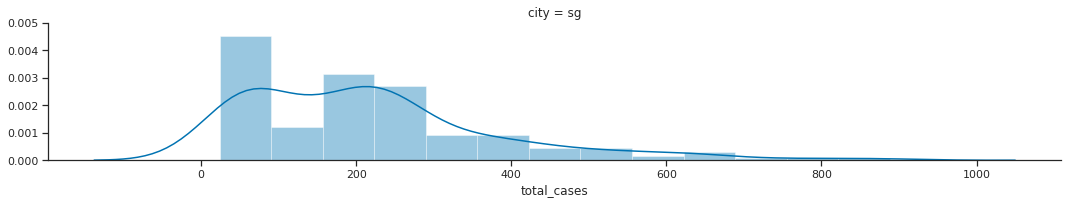

In [0]:
#Lets check the total cases of Dengue 
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=5)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.005)

In [0]:
#Lets see the factors also, like rainfall, max_temp, min_temp and so on.

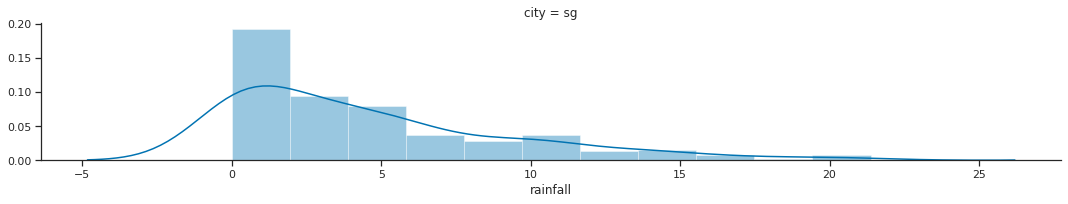

In [0]:
#Lets check the rainfall
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=5)  
g.map(sns.distplot, "rainfall") 


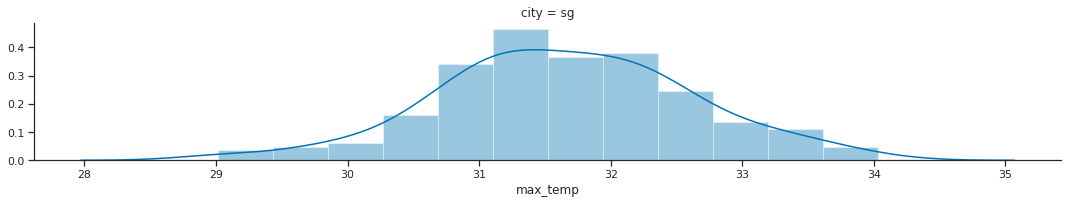

In [0]:
#Lets check the max_temp
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=5)  
g.map(sns.distplot, "max_temp") 

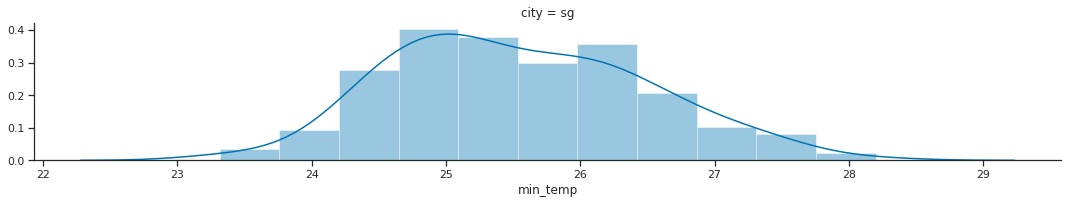

In [0]:
#Lets check the min_temp
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=5)  
g.map(sns.distplot, "min_temp") 

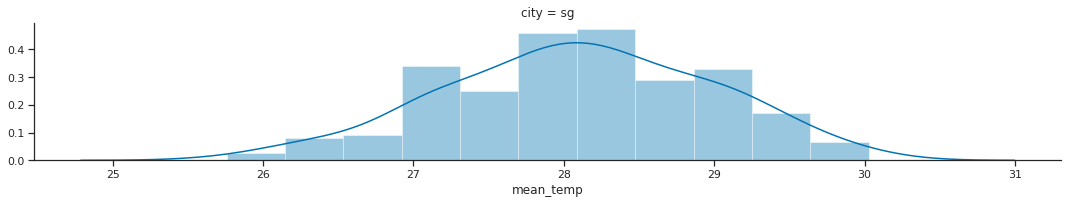

In [0]:
#Lets check the mean_temp
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=5)  
g.map(sns.distplot, "mean_temp") 

In [0]:
#Above plot shows that the average temperature and rainfall is suitable for that for mosquito breeding,
#Which might account for the high total cases of dengue in SG

In [0]:
dengue_train.groupby('city').mean().total_cases

city
sg    216.739796
Name: total_cases, dtype: float64

In [0]:
#Now let's check the evolution of dengue disease through time

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Evolution of dengue disease through time')

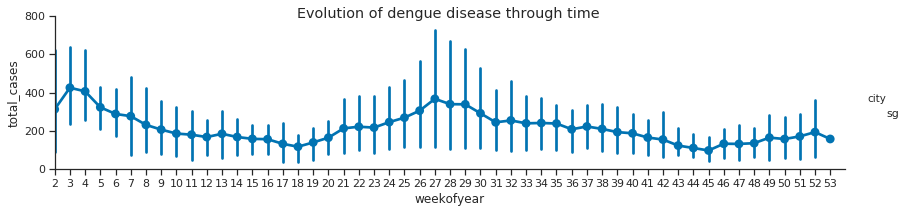

In [0]:
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(dengue_train, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = dengue_train.weekofyear.max()
min_x = dengue_train.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 800))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

In [0]:
#One clear trend is that the dengue virus becomes a lot more active after the dry season starting from week 18 
#An increase can also be observed towards the end of the year starting from week 45 which is the start of november (the monsoon seasons) as expected.

In [0]:
#Next, let's check to see if we are missing any values in this dataset

In [0]:
#Finding the number of NUll or NaN values in the dataframe
dengue_train.isnull().sum()

city                    0
year                    0
weekofyear              0
total_cases             0
rainfall                0
mean_temp               0
max_temp                0
min_temp                0
bone_pain               0
fever                   0
nausea                  0
dengue                  0
vomiting                0
aedes_mosq              0
muscle_pain             0
dengue_cases_plusone    0
temp_range              0
dtype: int64

In [0]:
dengue_features_test.isnull().sum()

city                    0
year                    0
weekofyear              0
rainfall                0
mean_temp               0
max_temp                0
min_temp                0
bone_pain               0
fever                   0
nausea                  0
dengue                  0
vomiting                0
aedes_mosq              0
muscle_pain             0
dengue_cases_plusone    0
temp_range              0
dtype: int64

In [0]:
#The data has been cleaned in the analysis file so we dont see any null or NaN here.

In [0]:
dengue_train_sg = dengue_train[dengue_train.city == 'sg'].copy()

In [0]:
dengue_test_sg = dengue_features_test[dengue_features_test.city == 'sg'].copy()

In [0]:
dengue_train_sg.head(5)

,city,year,weekofyear,total_cases,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_plusone,temp_range
0,sg,2014,3,401,0.000000,27.075000,30.350000,24.925000,71,65,10,43,57,95,54,336,5.425000
1,sg,2014,4,336,8.171429,26.171429,29.614286,24.057143,73,52,10,49,49,56,63,234,5.557143
2,sg,2014,5,234,2.600000,26.271429,29.100000,24.357143,61,79,11,55,31,48,18,273,4.742857
3,sg,2014,6,273,0.000000,25.757143,29.014286,23.642857,73,62,5,62,45,51,44,369,5.371429
4,sg,2014,7,369,0.000000,26.071429,30.371429,23.342857,54,55,12,21,38,95,38,193,7.028571


In [0]:
dengue_train_sg.isnull().sum()

city                    0
year                    0
weekofyear              0
total_cases             0
rainfall                0
mean_temp               0
max_temp                0
min_temp                0
bone_pain               0
fever                   0
nausea                  0
dengue                  0
vomiting                0
aedes_mosq              0
muscle_pain             0
dengue_cases_plusone    0
temp_range              0
dtype: int64

In [0]:
dengue_train_sg.fillna(method='ffill', inplace=True)

In [0]:
#dengue_features_test
dengue_test_sg.fillna(method='ffill', inplace=True)

In [0]:
#Our target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. 
#Standard regression techniques for this type of prediction include
'''
1. Poisson regression
2. Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and 
negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that 
the mean and variance of the population distributiona are equal. When they aren't,specifically when the variance is 
much larger than the mean, the negative binomial approach is better. 
'''

"\n1. Poisson regression\n2. Negative binomial regression\n\nWhich techniqe will perform better depends on many things, but the choice between Poisson regression and \nnegative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that \nthe mean and variance of the population distributiona are equal. When they aren't,specifically when the variance is \nmuch larger than the mean, the negative binomial approach is better. \n"

In [0]:
print('Singapore')
print('mean: ', dengue_train_sg.total_cases.mean())
print('var :', dengue_train_sg.total_cases.var())

Singapore
mean:  216.73979591836735
var : 27203.03451072737


In [0]:
#variance  >>  mean suggests total_cases can be described by a negative binomial distribution, 
#so we'll use a negative binomial regression below.

In [0]:
#Which inputs strongly correlate with total_cases

# compute the correlations
sg_correlations = dengue_train_sg.corr()

In [0]:
import matplotlib.cm as cm
from matplotlib import cm
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

sg_correlations.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,year,weekofyear,total_cases,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,dengue,vomiting,aedes_mosq,muscle_pain,dengue_cases_plusone,temp_range
year,1,0.0037,-0.57,0.15,-0.028,-0.094,0.016,0.14,0.17,-0.13,0.2,-0.41,0.071,0.022,-0.57,-0.12
weekofyear,0.0037,1,-0.19,0.2,0.13,-0.018,0.044,-0.29,0.089,0.016,0.062,-0.23,0.015,-0.048,-0.16,-0.067
total_cases,-0.57,-0.19,1,-0.086,0.22,0.073,0.19,0.38,-0.035,0.27,-0.2,0.88,0.015,-0.041,0.96,-0.13
rainfall,0.15,0.2,-0.086,1,-0.35,-0.26,-0.48,0.062,0.11,-0.029,-0.019,-0.067,0.07,0.074,-0.073,0.22
mean_temp,-0.028,0.13,0.22,-0.35,1,0.76,0.9,0.08,-0.14,0.13,-0.018,0.2,-0.096,-0.085,0.22,-0.13
max_temp,-0.094,-0.018,0.073,-0.26,0.76,1,0.58,-0.037,-0.12,0.059,-0.068,0.061,-0.054,-0.053,0.079,0.48
min_temp,0.016,0.044,0.19,-0.48,0.9,0.58,1,0.12,-0.12,0.062,0.013,0.16,-0.11,-0.083,0.2,-0.44
bone_pain,0.14,-0.29,0.38,0.062,0.08,-0.037,0.12,1,0.11,0.16,-0.01,0.52,0.086,0.01,0.37,-0.17
fever,0.17,0.089,-0.035,0.11,-0.14,-0.12,-0.12,0.11,1,-0.038,0.07,0.0037,-0.1,-0.031,-0.0082,-0.005
nausea,-0.13,0.016,0.27,-0.029,0.13,0.059,0.062,0.16,-0.038,1,-0.11,0.44,0.049,0.14,0.22,-0.0016


In [0]:
#Many of the temperature data are strongly correlated, which is expected.
#But the total_cases variable doesn't have many obvious strong correlations.

#Interestingly, total_cases seems to only have weak correlations with other variables 

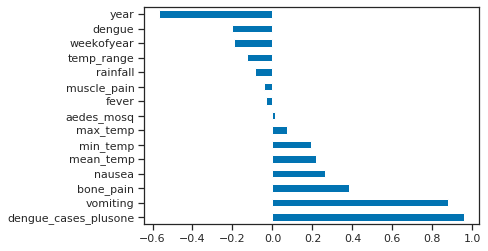

In [0]:
(sg_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)
sns.set(style="ticks", palette="colorblind")

In [0]:
#Looks like dengue_cases_+1 and vomiting are the most strongly correlated with total_cases. 

#A few good variables
#mean_temp
#min_temp
#ma_temp
#bone_pain

In [0]:
#A few bad variables corelation
#we can drop the columns with negative corelation in both 
#like weekofyear, year, dengue, temp_range

# Remove `week_start_date` string.
dengue_train_sg.drop('weekofyear', axis=1, inplace=True)

dengue_train_sg.drop('year', axis=1, inplace=True)

dengue_train_sg.drop('dengue', axis=1, inplace=True)

dengue_train_sg.drop('temp_range', axis=1, inplace=True)

In [0]:
dengue_train_sg.describe

<bound method NDFrame.describe of     city  total_cases   rainfall  ...  aedes_mosq  muscle_pain  dengue_cases_plusone
0     sg          401   0.000000  ...          95           54                   336
1     sg          336   8.171429  ...          56           63                   234
2     sg          234   2.600000  ...          48           18                   273
3     sg          273   0.000000  ...          51           44                   369
4     sg          369   0.000000  ...          95           38                   193
..   ...          ...        ...  ...         ...          ...                   ...
191   sg           37  14.485714  ...          66           12                    33
192   sg           33   4.628571  ...          97           44                    40
193   sg           40   2.685714  ...          67           39                    51
194   sg           51   7.771429  ...          77           47                    66
195   sg           66  19.85714

In [0]:
#Split it up!
#Since this is a timeseries model, we'll use a strict-future holdout set when we are splitting our train set and our test set.
#We'll keep around 20% of the original data for training and use the rest to test. 

print('Singapore')
print(dengue_train_sg.shape)

Singapore
(196, 13)


In [0]:
sg_train_subtrain = dengue_train_sg.head(156)
sg_train_subtest = dengue_train_sg.tail(dengue_train_sg.shape[0] - 156)

In [0]:
sg_train_subtrain.head(1)

,city,total_cases,rainfall,mean_temp,max_temp,min_temp,bone_pain,fever,nausea,vomiting,aedes_mosq,muscle_pain,dengue_cases_plusone
0,sg,401,0.0,27.075,30.35,24.925,71,65,10,57,95,54,336


In [0]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "rainfall + " \
                    "mean_temp + " \
                    "max_temp + " \
                    "min_temp + " \
                    "bone_pain + " \
                    "fever + " \
                    "nausea + " \
                    "vomiting + " \
                    "aedes_mosq + " \
                    "muscle_pain + " \
                    "dengue_cases_plusone"
                    
        
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sg_best_model = get_best_model(sg_train_subtrain, sg_train_subtest)

best alpha =  0.0001
best score =  72.525


Text(0.5, 0.98, 'Dengue Predicted Cases vs. Actual Cases')

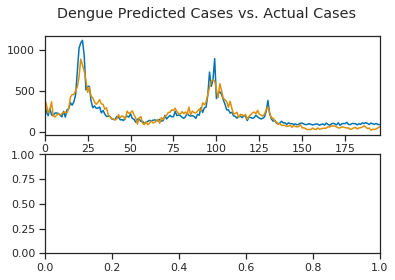

In [0]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sg
dengue_train_sg['fitted'] = sg_best_model.fittedvalues
dengue_train_sg.fitted.plot(ax=axes[0], label="Predictions")
dengue_train_sg.total_cases.plot(ax=axes[0], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")

In [0]:
sg_predictions = sg_best_model.predict(dengue_test_sg).astype(int)

submission = pd.read_csv('/mntDrive/My Drive/Datathon Dengue/data/submission_format.csv',
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sg_predictions])
submission.to_csv('/mntDrive/My Drive/Datathon Dengue/data/submission1.csv')

In [0]:
#These graphs can actually tell us a lot about where our model is going wrong and give us some good hints about where investments
#will improve the model performance.
#For example, we see that our model in blue does track the seasonality of Dengue cases. 

In [0]:
!pip install flask-ngrok
!pip install bokeh

In [0]:
#Using: https://medium.com/@kshitijvijay271199/flask-on-google-colab-f6525986797b and https://towardsdatascience.com/python-plotting-api-expose-your-scientific-python-plots-through-a-flask-api-31ec7555c4a8
#to do: 1. use our own results 2. make the data interactive

from flask_ngrok import run_with_ngrok
from flask import Flask, send_file, make_response
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import io
from sklearn.datasets import load_breast_cancer

def do_plot():
    # Loading 
    data = load_breast_cancer()
    breast_cancer_df = pd.DataFrame(data['data'])
    breast_cancer_df.columns = data['feature_names']
    breast_cancer_df['target'] = data['target']
    breast_cancer_df['diagnosis'] = [data['target_names'][x] for x in data['target']]
    feature_names= data['feature_names']

    corr = breast_cancer_df[list(feature_names)].corr(method='pearson')

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # here is the trick save your figure into a bytes object and you can afterwards expose it via flask
    bytes_image = io.BytesIO()
    plt.savefig(bytes_image, format='png')
    bytes_image.seek(0)
    return bytes_image

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    bytes_obj = do_plot()
    
    return send_file(bytes_obj,
                     attachment_filename='plot.png',
                     mimetype='image/png')

app.run()
